# 01 - Naive Bayesian - Gaussian - Lab

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Bayesian Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [1]:
# load libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

(500, 10)
(500,)


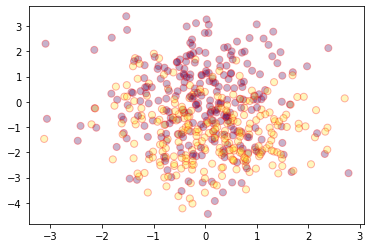

In [2]:
# generate data with 2 classes using sklearn
X, y = make_classification(n_samples = 500, n_features = 10, n_redundant = 2,
                           n_informative = 4, n_clusters_per_class = 2, random_state = 14)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='r', alpha=0.3)

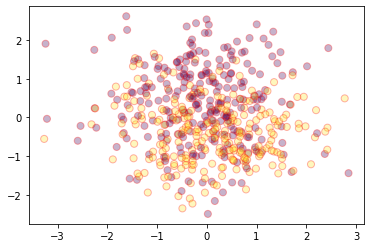

In [3]:
# standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# plot standardize X
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='r', alpha=0.3)

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)
print((np.unique(y_train).shape))
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

(2,)


In [5]:
# calculate mean and std
class GNB_classification:   
    def fit(self, X_train, y_train):
        self.n = X_train.shape[1]
        self.classes = np.unique(y_train)
        self.k = len(np.unique(y_train))
    #     print(k)
# mean and std
        mean = np.zeros((self.k, self.n))
        std = np.zeros((self.k, self.n))
        for i in (self.classes):
            mean[i, :] = X_train[y_train == i].mean(axis = 0)
            std[i, :] = X_train[y_train == i].std(axis = 0)
        self.mean, self.std = mean, std

# count number of samples in each class
        m = {}
        sum_m = X_train.shape[0]
        print("sum_m = ", sum_m)
        for i in (self.classes):
            m[i] = len(X_train[y_train == i])
            print("m = ", m)
# priors        
        self.priors = {}
        priors_total = 0
        for i in (self.classes):
            self.priors[i] = m[i]/sum_m
            print('priors =', self.priors)
            priors_total += self.priors[i]
        assert priors_total == 1, "total probability is not sum up to 1"    
        
    
    def predict(self, X_test):
        posteriors = np.zeros((X_test.shape[0], self.k))
        for i in (self.classes):
            p = self.gaussian_pdf(X_test, self.mean[i, :], self.std[i, :])
            p_total = np.prod(p, axis = 1)
            posteriors[:,i] = self.priors[i] * p_total
        y_hat = np.argmax(posteriors, axis = 1)    
        return y_hat
        
            
# function for probability distribution function
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right

In [6]:
model = GNB_classification()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

sum_m =  350
m =  {0: 180}
m =  {0: 180, 1: 170}
priors = {0: 0.5142857142857142}
priors = {0: 0.5142857142857142, 1: 0.4857142857142857}


In [7]:
y_hat

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [8]:
#if probability of class 1 is more than 0, then True
# yhat = 1 * posterior1 > posterior0
    
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, y_hat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, y_hat))

=========Average precision score=======
0.8592307692307692
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.79      0.96      0.86        70
           1       0.95      0.78      0.86        80

    accuracy                           0.86       150
   macro avg       0.87      0.87      0.86       150
weighted avg       0.88      0.86      0.86       150



In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

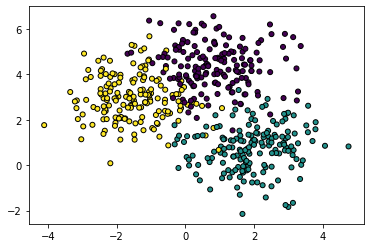

In [10]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# X, y = make_classification(n_samples=500, n_features=10, random_state=14)
# plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
#             s=25, edgecolor='k')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
NGB = GNB_classification()

NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)

sum_m =  350
m =  {0: 115}
m =  {0: 115, 1: 122}
m =  {0: 115, 1: 122, 2: 113}
priors = {0: 0.32857142857142857}
priors = {0: 0.32857142857142857, 1: 0.3485714285714286}
priors = {0: 0.32857142857142857, 1: 0.3485714285714286, 2: 0.32285714285714284}


In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

In [13]:
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  0.8874592074592075
Class 1 score:  0.9471717171717172
Class 2 score:  0.9149389567147613
